# Notebook used for social planner optimization

Creation of cost curve.

In [1]:
import os

import pandas as pd
from pandas import concat, Series, DataFrame, options
from numpy import inf
import matplotlib.pyplot as plt

from project.model import get_inputs
from project.utils import make_plot

In [2]:
insulation = {'Wall': (True, False, False, False), 'Floor': (False, True, False, False), 'Roof': (False, False, True, False), 'Windows': (False, False, False, True)}
insulation = pd.MultiIndex.from_frame(pd.DataFrame(insulation))

### Loading inputs

In [3]:
output = get_inputs()
buildings = output['buildings']
energy_prices = output['energy_prices']
cost_insulation = output['cost_insulation']
carbon_emission = output['carbon_emission']
carbon_value_kwh = output['carbon_value_kwh']

2022-11-16 11:31:15,565 - 93008 - log_ - INFO - Creating AgentBuildings object


In [4]:
output = buildings.mitigation_potential(energy_prices, cost_insulation, carbon_emission, carbon_value_kwh)

In [6]:
output.keys()

dict_keys(['Stock (dwellings/segment)', 'Surface (m2/segment)', 'Consumption before (kWh/dwelling)', 'Consumption before (kWh/segment)', 'Consumption actual before (kWh/dwelling)', 'Consumption actual before (kWh/segment)', 'Consumption actual after (kWh/dwelling)', 'Consumption actual after (kWh/segment)', 'Consumption saved (kWh/dwelling)', 'Consumption saved (kWh/segment)', 'Consumption actual saved (kWh/dwelling)', 'Consumption actual saved (kWh/segment)', 'Emission before (gCO2/dwelling)', 'Emission after (gCO2/dwelling)', 'Emission saved (gCO2/dwelling)', 'Emission value before (euro/dwelling)', 'Emission value after (euro/dwelling)', 'Emission value saved (euro/dwelling)', 'Cost insulation (euro/dwelling)', 'Cost insulation (euro/segment)', 'Bill before (euro/dwelling)', 'Bill after (euro/dwelling)', 'Bill saved (euro/dwelling)', 'Best NPV', 'Max consumption saved'])

x = 'Consumption saved (kWh/segment)'
y = 'Cost insulation (euro/segment)' / 'Consumption saved (kWh/segment)'

1. existing = True
2. concat by Housing type, Heating system, Wall, Floor, Roof

In [7]:
levels = ['Housing type', 'Heating system', 'Wall', 'Floor', 'Roof']

consumption_saved = output['Consumption saved (kWh/segment)']
cost_insulation = output['Cost insulation (euro/segment)']
cost_insulation[consumption_saved == 0] = 0
consumption_before = output['Consumption before (kWh/segment)']
surface = output['Surface (m2/segment)']

consumption_saved = consumption_saved.groupby(levels).sum().loc[:, insulation]
cost_insulation = cost_insulation.groupby(levels).sum().loc[:, insulation]
consumption_before = consumption_before.groupby(levels).sum()
surface = surface.groupby(levels).sum()

cost_efficiency = cost_insulation / consumption_saved

In [10]:
cost_efficiency

Wall                                                               True  \
Floor                                                             False   
Roof                                                              False   
Windows                                                           False   
Housing type  Heating system                 Wall Floor Roof              
Multi-family  Electricity-Heat pump water    0.1  0.5   0.1         NaN   
                                             0.5  0.5   0.5   21.290664   
              Electricity-Performance boiler 0.5  0.2   0.1    8.178774   
                                                  0.5   0.1    8.038459   
                                                        2.5    7.943795   
                                             2.5  0.5   0.5    1.324222   
                                                  2.0   2.5    1.318936   
              Natural gas-Performance boiler 0.1  0.2   0.1         NaN   
                                                  0.5   0.1         NaN   
                                             0.5  0.5   0.5    6.472362   
                                             1.0  2.0   0.5    2.829939   
              Natural gas-Standard boiler    2.5  2.0   2.5    0.833013   
              Oil fuel-Performance boiler    0.1  0.2   0.1         NaN   
                                                  0.5   0.1         NaN   
                                             0.5  0.5   0.5    6.408542   
                                             2.5  2.0   0.5    1.057690   
                                                        2.5    1.055149   
              Oil fuel-Standard boiler       2.5  2.0   2.5    0.833013   
              Wood fuel-Performance boiler   0.1  0.2   0.1         NaN   
                                                  0.5   0.1         NaN   
                                             0.5  0.5   0.5    6.408542   
                                             1.0  2.0   0.5    2.829939   
              Wood fuel-Standard boiler      2.5  2.0   2.5    0.833013   
Single-family Electricity-Heat pump water    0.1  0.2   0.1         NaN   
                                             0.5  0.5   0.1   21.001866   
              Electricity-Performance boiler 0.1  0.5   0.1         NaN   
                                             0.5  0.2   0.1    8.001115   
                                                  0.5   0.1    7.952158   
                                             1.0  0.5   0.5    3.519885   
                                             2.5  0.5   0.5    1.317313   
              Natural gas-Performance boiler 0.1  0.2   0.1         NaN   
                                             0.5  0.5   0.1    6.384567   
                                             1.0  0.5   0.1    2.820767   
                                             2.5  0.5   0.5    1.053851   
                                                  2.0   0.5    1.052865   
                                                        2.5    1.051531   
              Oil fuel-Performance boiler    0.1  0.2   0.1         NaN   
                                                  0.5   0.1         NaN   
                                             0.5  0.5   0.1    6.384567   
                                             1.0  0.5   0.1    2.820767   
                                             2.5  0.5   0.5    1.053851   
                                                  2.0   0.5    1.052865   
                                                        2.5    1.051531   
              Wood fuel-Performance boiler   0.1  0.2   0.1         NaN   
                                             0.5  0.5   0.1    6.384567   
              Wood fuel-Standard boiler      0.5  0.5   0.1    5.022415   
                                             1.0  0.5   0.5    2.223085   
                                             2.5  0.5   0.5    0.831987   
                         

In [9]:
consumption_saved

Wall                                                                  True  \
Floor                                                                False   
Roof                                                                 False   
Windows                                                              False   
Housing type  Heating system                 Wall Floor Roof                 
Multi-family  Electricity-Heat pump water    0.1  0.5   0.1   0.000000e+00   
                                             0.5  0.5   0.5   6.547678e+07   
              Electricity-Performance boiler 0.5  0.2   0.1   4.253061e+08   
                                                  0.5   0.1   1.435440e+09   
                                                        2.5   1.286688e+09   
                                             2.5  0.5   0.5   4.371261e+09   
                                                  2.0   2.5   3.309470e+09   
              Natural gas-Performance boiler 0.1  0.2   0.1   0.000000e+00   
                                                  0.5   0.1   0.000000e+00   
                                             0.5  0.5   0.5   2.120059e+09   
                                             1.0  2.0   0.5   6.912490e+09   
              Natural gas-Standard boiler    2.5  2.0   2.5   1.415479e+10   
              Oil fuel-Performance boiler    0.1  0.2   0.1   0.000000e+00   
                                                  0.5   0.1   0.000000e+00   
                                             0.5  0.5   0.5   1.453160e+08   
                                             2.5  2.0   0.5   1.650844e+09   
                                                        2.5   7.555870e+08   
              Oil fuel-Standard boiler       2.5  2.0   2.5   4.176346e+08   
              Wood fuel-Performance boiler   0.1  0.2   0.1   0.000000e+00   
                                                  0.5   0.1   0.000000e+00   
                                             0.5  0.5   0.5   1.272025e+07   
                                             1.0  2.0   0.5   5.400943e+07   
              Wood fuel-Standard boiler      2.5  2.0   2.5   1.203355e+08   
Single-family Electricity-Heat pump water    0.1  0.2   0.1   0.000000e+00   
                                             0.5  0.5   0.1   2.141034e+08   
              Electricity-Performance boiler 0.1  0.5   0.1   0.000000e+00   
                                             0.5  0.2   0.1   4.973988e+09   
                                                  0.5   0.1   4.635800e+09   
                                             1.0  0.5   0.5   4.609299e+09   
                                             2.5  0.5   0.5   9.114051e+09   
              Natural gas-Performance boiler 0.1  0.2   0.1   0.000000e+00   
                                             0.5  0.5   0.1   4.990036e+09   
                                             1.0  0.5   0.1   1.657294e+10   
                                             2.5  0.5   0.5   2.917763e+10   
                                                  2.0   0.5   8.052077e+09   
                                                        2.5   1.196044e+09   
              Oil fuel-Performance boiler    0.1  0.2   0.1   0.000000e+00   
                                                  0.5   0.1   0.000000e+00   
                                             0.5  0.5   0.1   1.545628e+09   
                                             1.0  0.5   0.1   7.380372e+09   
                                             2.5  0.5   0.5   1.816298e+10   
                                                  2.0   0.5   1.165472e+10   
                                                        2.5   6.047680e+09   
              Wood fuel-Performance boiler   0.1  0.2   0.1   0.000000e+00   
                                             0.5  0.5   0.1   6.455164e+08   
              Wood fuel-Standard boiler      0.5  0.5   0.1   1.731152e+09   
                      

In [8]:
cost_insulation

Wall                                                                  True  \
Floor                                                                False   
Roof                                                                 False   
Windows                                                              False   
Housing type  Heating system                 Wall Floor Roof                 
Multi-family  Electricity-Heat pump water    0.1  0.5   0.1   0.000000e+00   
                                             0.5  0.5   0.5   1.394044e+09   
              Electricity-Performance boiler 0.5  0.2   0.1   3.478483e+09   
                                                  0.5   0.1   1.153872e+10   
                                                        2.5   1.022118e+10   
                                             2.5  0.5   0.5   5.788520e+09   
                                                  2.0   2.5   4.364980e+09   
              Natural gas-Performance boiler 0.1  0.2   0.1   0.000000e+00   
                                                  0.5   0.1   0.000000e+00   
                                             0.5  0.5   0.5   1.372179e+10   
                                             1.0  2.0   0.5   1.956192e+10   
              Natural gas-Standard boiler    2.5  2.0   2.5   1.179112e+10   
              Oil fuel-Performance boiler    0.1  0.2   0.1   0.000000e+00   
                                                  0.5   0.1   0.000000e+00   
                                             0.5  0.5   0.5   9.312636e+08   
                                             2.5  2.0   0.5   1.746080e+09   
                                                        2.5   7.972570e+08   
              Oil fuel-Standard boiler       2.5  2.0   2.5   3.478948e+08   
              Wood fuel-Performance boiler   0.1  0.2   0.1   0.000000e+00   
                                                  0.5   0.1   0.000000e+00   
                                             0.5  0.5   0.5   8.151828e+07   
                                             1.0  2.0   0.5   1.528434e+08   
              Wood fuel-Standard boiler      2.5  2.0   2.5   1.002410e+08   
Single-family Electricity-Heat pump water    0.1  0.2   0.1   0.000000e+00   
                                             0.5  0.5   0.1   4.496570e+09   
              Electricity-Performance boiler 0.1  0.5   0.1   0.000000e+00   
                                             0.5  0.2   0.1   3.979745e+10   
                                                  0.5   0.1   3.686461e+10   
                                             1.0  0.5   0.5   1.622420e+10   
                                             2.5  0.5   0.5   1.200606e+10   
              Natural gas-Performance boiler 0.1  0.2   0.1   0.000000e+00   
                                             0.5  0.5   0.1   3.185922e+10   
                                             1.0  0.5   0.1   4.674841e+10   
                                             2.5  0.5   0.5   3.074887e+10   
                                                  2.0   0.5   8.477747e+09   
                                                        2.5   1.257677e+09   
              Oil fuel-Performance boiler    0.1  0.2   0.1   0.000000e+00   
                                                  0.5   0.1   0.000000e+00   
                                             0.5  0.5   0.1   9.868163e+09   
                                             1.0  0.5   0.1   2.081831e+10   
                                             2.5  0.5   0.5   1.914107e+10   
                                                  2.0   0.5   1.227084e+10   
                                                        2.5   6.359323e+09   
              Wood fuel-Performance boiler   0.1  0.2   0.1   0.000000e+00   
                                             0.5  0.5   0.1   4.121343e+09   
              Wood fuel-Standard boiler      0.5  0.5   0.1   8.694566e+09   
                      

In [22]:
cost_efficiency.head()

Wall                                                              True  \
Floor                                                            False   
Roof                                                             False   
Windows                                                          False   
Housing type Heating system                 Wall Floor Roof              
Multi-family Electricity-Heat pump water    0.1  0.5   0.1         NaN   
                                            0.5  0.5   0.5   21.290664   
             Electricity-Performance boiler 0.5  0.2   0.1    8.178774   
                                                 0.5   0.1    8.038459   
                                                       2.5    7.943795   

Wall                                                             False  \
Floor                                                             True   
Roof                                                             False   
Windows                                                          False   
Housing type Heating system                 Wall Floor Roof              
Multi-family Electricity-Heat pump water    0.1  0.5   0.1   19.266490   
                                            0.5  0.5   0.5   18.688863   
             Electricity-Performance boiler 0.5  0.2   0.1         NaN   
                                                 0.5   0.1    7.071113   
                                                       2.5    7.010134   

Wall                                                                    \
Floor                                                            False   
Roof                                                              True   
Windows                                                          False   
Housing type Heating system                 Wall Floor Roof              
Multi-family Electricity-Heat pump water    0.1  0.5   0.1         NaN   
                                            0.5  0.5   0.5   10.990718   
             Electricity-Performance boiler 0.5  0.2   0.1         NaN   
                                                 0.5   0.1         NaN   
                                                       2.5    0.688271   

Wall                                                                    
Floor                                                                   
Roof                                                             False  
Windows                                                           True  
Housing type Heating system                 Wall Floor Roof             
Multi-family Electricity-Heat pump water    0.1  0.5   0.1   98.617999  
                                            0.5  0.5   0.5   95.585773  
             Electricity-Performance boiler 0.5  0.2   0.1   36.579687  
                                                 0.5   0.1    6.408524  
                                                       2.5    6.331969

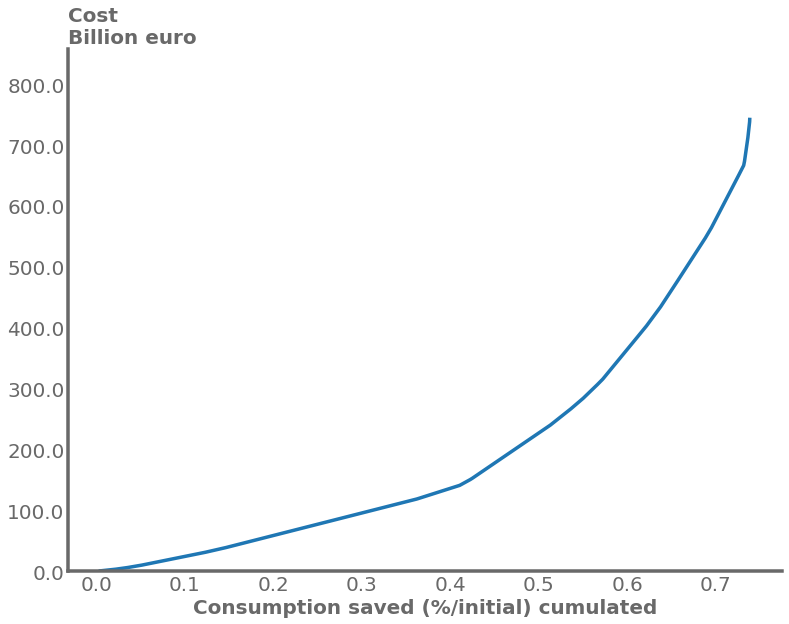

In [30]:
x = consumption_saved.stack(consumption_saved.columns.names).squeeze().rename('Consumption saved (%/initial)')
y = cost_efficiency.stack(cost_efficiency.columns.names).squeeze().rename('Cost efficiency (euro/kWh/year)')
c = (x * y).rename('Cost (Billion euro)') / 10**9
df = pd.concat((x, y, c), axis=1)

# sort by marginal cost
df.sort_values(y.name, inplace=True)

df[x.name] = x / consumption_before.sum()
df['{} cumulated'.format(x.name)] = df[x.name].cumsum()

df['{} cumulated'.format(c.name)] = df[c.name].cumsum()

df.dropna(inplace=True)
df = df.set_index('{} cumulated'.format(x.name))['{} cumulated'.format(c.name)]

df.to_csv('output/cost_efficiency_stock.csv')

make_plot(df, y_label=c.name, legend=False, integer=False)

In [ ]:
df

In [ ]:
for n, g in cost_efficiency.groupby(['Housing type', 'Heating system']):
    pass

In [ ]:
x = consumption_saved.stack(consumption_saved.columns.names).squeeze().rename('Consumption saved (%/initial)') / consumption_before.sum()
y = cost_efficiency.stack(cost_efficiency.columns.names).squeeze().rename('Cost efficiency (euro/kWh/year)')